# This assignment provides hands-on data wrangling and classification experience
For this assignment, you are a Machine Learning Engineer at a local bank, and your task is to analyze whether loan applicants qualify, based on their personal information.
Tasks are:
I. Data wrangling to perform one-hot-encoding for the data and normalization
II. Eliminating unimportant features
III. Performing classification to predict qualification for loan in future.

### Import the necessary modules

In [1]:
import os
import tensorflow as tf
#from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load the training data. Print out its shape and first few rows.

In [2]:
url = "https://raw.githubusercontent.com/FourthBrain/2.-Classification/main/bank-full.csv?token=ARJV76TWTYENKFZKXB4CUYS7SIDOM"
df_train = pd.read_csv(url, sep=';')
print(np.shape(df_train))
df_train.head()


(45211, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Exercise: Perform Exploratory Data Analysis on each feature

In [3]:
### START CODE HERE ###
# Get the info (column number and name, non-null count, and dtype) for each column in the training df
df_train.info()
# Get summary statistics for the training df with the describe() method
df_train.describe()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Exercise: Visualize the distributions of each numeric feature

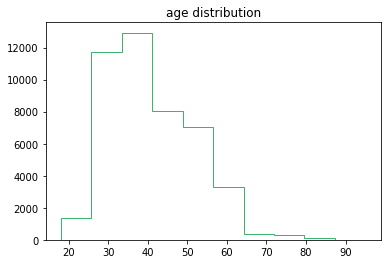

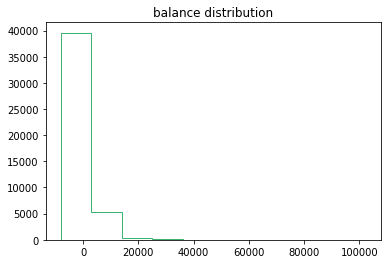

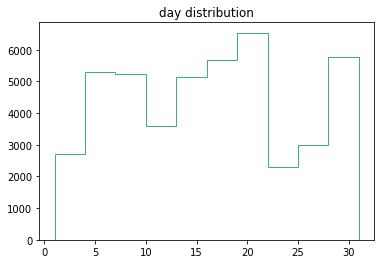

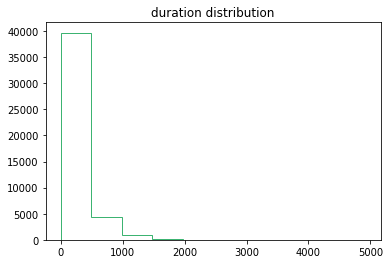

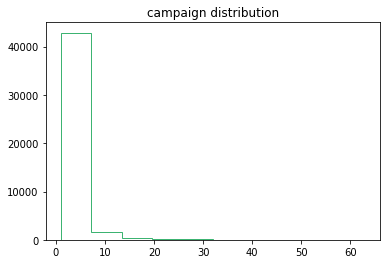

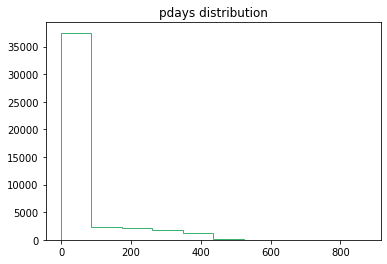

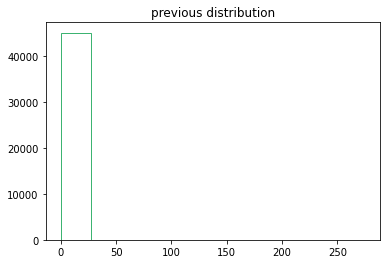

In [4]:
### START CODE HERE ###
# Use a list comprehension to extract the names of the numeric columns of the training df 
# (those with an integer dtype)
numeric_columns = df_train.select_dtypes([np.number]).columns.values.tolist()
# Loop through the numeric columns
for col in numeric_columns:
    # Generate a histogram of the current numeric feature column
    plt.hist(df_train[col], color='mediumseagreen', histtype='step')
    plt.title(f'{col} distribution')
    plt.show()
### END CODE HERE ###

### Exercise: Inspect the unique values of the non-numeric columns, and their counts

In [5]:
### START CODE HERE ###
# Use a list comprehension to list the names of the non-numeric columns in the training df
# (those with an object dtype)
non_numeric_columns = df_train.select_dtypes(exclude=np.number).columns.values.tolist()
# Loop through the non-numeric columns
for col in non_numeric_columns:
    # Print the counts of each unique value in the current column
    print(df_train[col].value_counts(sort=False, normalize=False))
### END CODE HERE ###

admin.           5171
self-employed    1579
services         4154
management       9458
housemaid        1240
retired          2264
student           938
technician       7597
blue-collar      9732
entrepreneur     1487
unemployed       1303
unknown           288
Name: job, dtype: int64
single      12790
married     27214
divorced     5207
Name: marital, dtype: int64
tertiary     13301
secondary    23202
primary       6851
unknown       1857
Name: education, dtype: int64
yes      815
no     44396
Name: default, dtype: int64
yes    25130
no     20081
Name: housing, dtype: int64
yes     7244
no     37967
Name: loan, dtype: int64
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
may    13766
dec      214
aug     6247
nov     3970
jun     5341
jan     1403
jul     6895
apr     2932
mar      477
oct      738
feb     2649
sep      579
Name: month, dtype: int64
success     1511
other       1840
failure     4901
unknown    36959
Name: poutcome, dtype: int64
y

### Exercise: Some columns are 'yes'/'no' binaries. Map them to integer binaries.

In [6]:
### START CODE HERE ###
# Make a list of the binary columns. There should be 4 of them. 
# Find their names in the output of the previous exercise.
binary_columns = ['default', 'housing', 'loan', 'y']
# Create a dictionary in which the keys map to the values
# Remember, we want to replace 'no' and 'yes' with the appropriate integers
binary_mapping = {'yes': 1.0, 'no': 0.0}
# Map the binary columns
for col in binary_columns:
    # Apply the mapping to the current column with the map() method for Pandas Series
    df_train[col] = df_train[col].map(binary_mapping)
### END CODE HERE ###

### Exericse: Map the months from strings to integers, with 1 corresponding to January, etc.

In [7]:
### START CODE HERE ###
# Create the mapping dictionary
# Make sure the months' names are formatted properly
month_mapping = {'jan':0, 'feb':1, 'mar':2, 'apr':3
                 , 'may':4, 'jun':5, 'jul':6, 'aug':7
                 , 'sep':8, 'oct':9, 'nov':10, 'dec':11}
# Map the months
df_train['month'] = df_train['month'].map(month_mapping)
### END CODE HERE ###

### Exercise: One-hot encode the remaining categorical features

In [8]:
### START CODE HERE ###
# List the categorical features. There should be 5 of them.
categorical_columns = ['job', 'marital', 'education', 'contact', 'poutcome']
# One-hot encode the categorical features with the get_dummies() function for Pandas DataFrames
for i,j in enumerate(categorical_columns):
  df_train[j] = pd.get_dummies(df_train[j], columns=categorical_columns[i])
### E3ND CODE HERE ###

### Inspect the first few rows of our preprocessed DataFrame

In [9]:
df_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0,0,0,0.0,2143,1.0,0.0,0,5,4,261,1,-1,0,0,0.0
1,44,0,0,0,0.0,29,1.0,0.0,0,5,4,151,1,-1,0,0,0.0
2,33,0,0,0,0.0,2,1.0,1.0,0,5,4,76,1,-1,0,0,0.0
3,47,0,0,0,0.0,1506,1.0,0.0,0,5,4,92,1,-1,0,0,0.0
4,33,0,0,0,0.0,1,0.0,0.0,0,5,4,198,1,-1,0,0,0.0


### Exercise: Extract the target values from the training DataFrame

In [10]:
### START CODE HERE ###
# Extract the target values from the training DataFrame
y = df_train['y'] # (45211,)
# Drop the target column from the training DataFrame
del df_train['y'] # (45209, 16)
### END CODE HERE ###

### Exercise: Inspect how balanced y is

For a balanced binary target, approximately half of its entries will be 1

In [11]:
### START CODE HERE ###
# Compute the fraction of positive values in the target
fraction = y.value_counts()[1] / y.value_counts()[0]
print('proportion of positive values: %.3f ' % (fraction))
### END CODE HERE ###

proportion of positive values: 0.132 


### Print the current number of features

In [12]:
print(f'The training df currently has {df_train.shape[1]} features')

The training df currently has 16 features


### Exercise: Visually inspect the Pearson Correlations of each feature

Pandas provides the `corr()` method for DataFrames for this purpose

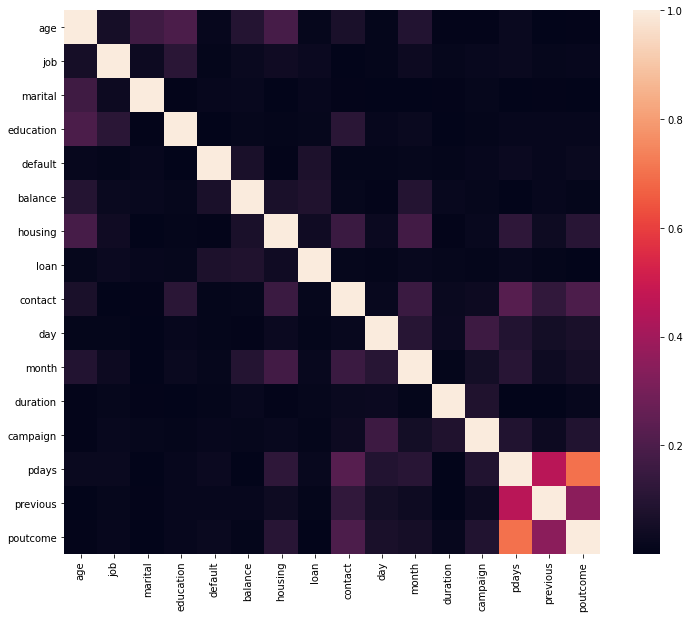

In [13]:
plt.figure(figsize=(12,10))
### START CODE HERE ###
# Compute the Pearson Correlation of each feature in the training df
cor = df_train.corr(method='pearson')  # computation of pairwise correlation of columns
### END CODE HERE ###
# Plot the correlations
sns.heatmap(cor.abs())
plt.show()
# Some intersting correlations pop up that need further analysis (later)
# we need to eliminate features that have very high absolute correlations

## Feature Selection

### Exercise: Drop feature columns which have a high absolute Pearson Correlation

Let's choose to drop the higher-indexed of the two correlated columns, i.e. the one that appears farther to the right in the df

In [14]:
### START CODE HERE ### 
# Initialize a list indicating whether to keep a column in the training df
# For now, set all entries to True
keep_columns = cor.columns.values.tolist()
remove = []
# Loop over all columns
for i in range(len(cor)) :
    # Loop over all columns to the right of the current one
    for j in cor.abs().iloc[i][:] :
        # If the absolute correlation between the current two columns is greater than or equal to 0.7 and less than 1.0 ...
        if (j >= 0.7 and j < 1) : 
            # append column name to list 'remove'...
            remove.append(keep_columns[i]) 

# Drop identified columns from 'keep_columns'
for i in remove: 
  keep_columns.remove(i)

# Make a new df with the columns we've decided to keep from the training df
df_out = df_train[keep_columns]
### END CODE HERE ###
print('The following columns are present in the new df:')
print(keep_columns)
print(f'The old df had {df_train.shape[1]} features. The new df has {df_out.shape[1]} features.')

The following columns are present in the new df:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'previous']
The old df had 16 features. The new df has 14 features.


### Feature Selection on p-value (statistical significance to Y value)

In [15]:
selected_columns = keep_columns[0:]
import statsmodels.api as sm
def backwardElimination(x, y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        #maxVar = max(regressor_OLS.pvalues).astype(float)
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.01
# Note that we're passing in df_out, not df_train
data_modeled, selected_columns = backwardElimination(df_out.values, y, SL, selected_columns)

In [16]:
print('The following columns remain based on p-value selection:')
print(selected_columns)
# Make a reduced df
data_red = pd.DataFrame(data = data_modeled, columns = selected_columns)
print(f'After selection by Pearson Correlation, we had {df_out.shape[1]} features.')
print(f'After selection by p-value, we have {data_red.shape[1]} features.')

The following columns remain based on p-value selection:
['age' 'job' 'education' 'balance' 'housing' 'loan' 'contact' 'day'
 'duration' 'campaign' 'previous']
After selection by Pearson Correlation, we had 14 features.
After selection by p-value, we have 11 features.


### Visualize the distributions of the selected features

Ignore the deprecation warnings

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

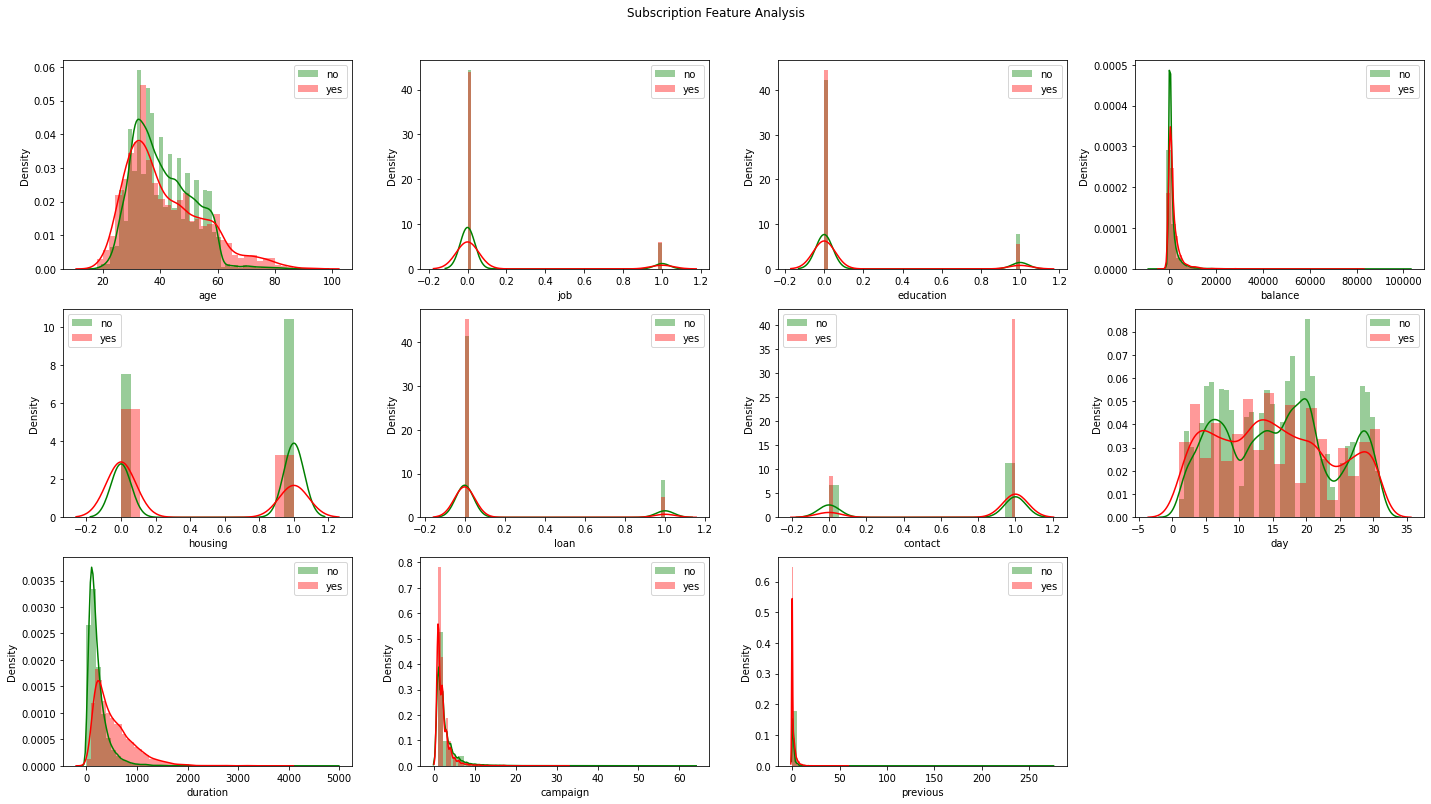

In [17]:
# Visualize the selected features
fig = plt.figure(figsize = (20, 25))
j = 0
for i in data_red.columns:
    plt.subplot(7, 4, j+1)
    j += 1
    sns.distplot(data_red[i][y==0], color='g', label = 'no')
    sns.distplot(data_red[i][y==1], color='r', label = 'yes')
    plt.legend(loc='best')
fig.suptitle('Subscription Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Exercise: Cross-validated LASSO feature importance

In [18]:
### START CODE HERE ###

# Instantiate the cross-validated LASSO regressor
reg = Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False
            , copy_X=True, max_iter=1000, tol=0.0001, warm_start=False
            , positive=False, random_state=None, selection='cyclic'
            )

# Train the regressor on the reduced df
reg.fit(data_red, y)
### END CODE HERE ###
print("Best alpha using built-in LassoCV: %f" % reg.alpha)
print("Best score using built-in LassoCV: %f" %reg.score(data_red, y))
coef = pd.Series(reg.coef_, index = data_red.columns)
print(f"Lasso picked {sum(coef != 0)} features and eliminated the other {sum(coef == 0)} features")

Best alpha using built-in LassoCV: 1.000000
Best score using built-in LassoCV: 0.157467
Lasso picked 2 features and eliminated the other 9 features


### Visualize the LASSO feature importances

Text(0.5, 1.0, 'Feature importance using Lasso Model')

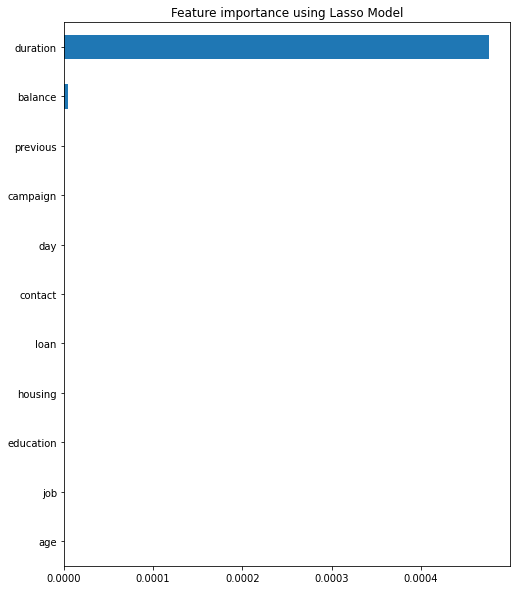

In [19]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
#pdays is the only other feature here

### Print summary statistics for the reduced df

In [20]:
data_red.describe()

,age,job,education,balance,housing,loan,contact,day,duration,campaign,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,0.114375,0.151534,1362.272058,0.555838,0.160226,0.647741,15.806419,258.163080,2.763841,0.580323
std,10.618762,0.318269,0.358572,3044.765829,0.496878,0.366820,0.477680,8.322476,257.527812,3.098021,2.303441
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,0.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,103.000000,1.000000,0.000000
50%,39.000000,0.000000,0.000000,448.000000,1.000000,0.000000,1.000000,16.000000,180.000000,2.000000,0.000000
75%,48.000000,0.000000,0.000000,1428.000000,1.000000,0.000000,1.000000,21.000000,319.000000,3.000000,0.000000
max,95.000000,1.000000,1.000000,102127.000000,1.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,275.000000


## Random Forest Classification

### First, import some convenience functions and perform a 70-30 train-test split split on the (reduced) training data

In [21]:
from sklearn.model_selection import cross_val_score
from numpy import mean
x_train, x_test, y_train, y_test = train_test_split(data_red.values, y.values, test_size = 0.3)

### Exercise: Default Random Forest Classifier, without balancing

In [22]:
### START CODE HERE ###
# Instantiate the classifier
# Set the max depth to 10 and the random state to 0
clf = RandomForestClassifier(max_depth=10, random_state=0)
# Train the classifier
clf.fit(x_train, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.sum(cm.trace()) / prediction.shape[0]
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.8953848422294308
Mean Recall = 0.295
Mean F1 Score = 0.395
[[11647   311]
 [ 1108   498]]


### Exercise: Random Forest Classifier with weight balancing

The target class is highly imbalanced; recall from earlier that only about 11.7% of loan applicants in this dataset are approved. One way around this is to add weight balancing to the classifier.

This exercise is otherwise a repeat of the previous one.

In [23]:
### START CODE HERE ###
# Instantiate the classifier
# Set the max depth to 10, the random state to 0, and the class_weight to 'balanced'
clf = RandomForestClassifier(max_depth=10, random_state=0, class_weight='balanced')
# Train the classifier
clf.fit(x_train, y_train)
# Use the classifier to make predictions from the test features
prediction = clf.predict(x_test)
# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)
# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.sum(cm.trace()) / prediction.shape[0]
### END CODE HERE ###
print(f"Accuracy = {accuracy}")
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.8248304335004424
Mean Recall = 0.719
Mean F1 Score = 0.536
[[9906 2052]
 [ 324 1282]]


### Optimal Parameter Search: Random Forest Regressor


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = [
              {'n_estimators': [3, 10, 20, 30, 40], 'max_features': [2, 4, 6, 8, 10]},            # 5 x 5 = 25 combinations
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}  # 2 x 3 = 6 combinations
]                                                                                         # 25 + 6 = 31 combinations
                                                                          # 3-fold CV so 3 * 31 = 93 training rounds

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_error')

In [25]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=10,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                               

In [26]:
# Make predictions 
prediction = grid_search.best_estimator_.predict(x_test)

# Compute the confusion matrix between the true and predicted test targets
cm = confusion_matrix(y_test, prediction)

# Compute the model's accuracy by summing the diagonals of the confusion matrix
# (i.e. taking its trace) and dividing by the number of test samples
accuracy = np.sum(cm.trace()) / prediction.shape[0]

print(f"Accuracy = {accuracy}")
precision_scores = cross_val_score(clf, x_test, y_test, scoring='precision', cv=5)
recall_scores = cross_val_score(clf, x_test, y_test, scoring='recall', cv=5)
f1_scores = cross_val_score(clf, x_test, y_test, scoring='f1', cv=5)
print(f'Mean Precision = {mean(precision_scores):.3f}')
print(f'Mean Recall = {mean(recall_scores):.3f}')
print(f'Mean F1 Score = {mean(f1_scores):.3f}')
print(cm)

Accuracy = 0.8320554408728988
Mean Precision = 0.427
Mean Recall = 0.719
Mean F1 Score = 0.536
[[10067  1891]
 [  387  1219]]


### Neural Network (Softmax Binary Classifier) 

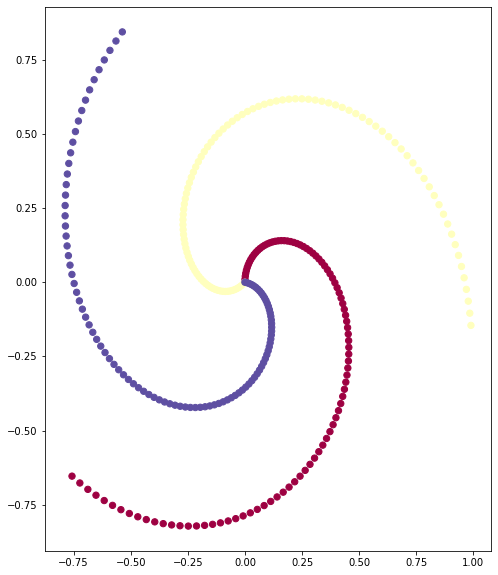

In [27]:
N = 100                           # number of points per class
D = 2                             # dimensionality 
K = 3                             # number of classes 
X = np.zeros((N*K, D))            # data matrix
y = np.zeros(N*K, dtype='uint8')  # class labels

for j in range(K):
  ix = range(N*j, N*(j+1))
  r = np.linspace(0.0, 1, N) # radius
  t = np.linspace(j*4, (j+1)*4, N)
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j

# visualize data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [28]:
h = 100
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))

W2 = np.random.randn(h, K) * 0.01
b2 = np.zeros((1, K))
num_examples = X.shape[0]

step_size = 1e-1
reg = 1e-4

In [29]:
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation
  hidden_layer -= np.mean(hidden_layer, axis=0)
  scores = np.dot(hidden_layer, W2) + b2
  scores -= np.max(scores)

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = - np.log(probs[range(num_examples), y])
  data_loss = np.sum(correct_logprobs) / num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss 
  if i % 1000 == 0:
    print('iteration %d: loss %f' % (i, loss))

  # compute the gradient on the scores  
  dscores = probs
  dscores[range(num_examples), y] -= 1
  dscores /= num_examples

  dW2 = hidden_layer.T.dot(dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # backprop into hidden layer
  dhidden = dscores.dot(W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b  
  dW = X.T.dot(dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization to the contribution
  dW2 += reg * W2
  dW += reg * W

  # perform parameter update
  W += -step_size * dW
  b += -step_size * db 
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098694
iteration 1000: loss 0.639551
iteration 2000: loss 0.397847
iteration 3000: loss 0.247883
iteration 4000: loss 0.202825
iteration 5000: loss 0.178894
iteration 6000: loss 0.166093
iteration 7000: loss 0.167697
iteration 8000: loss 0.160041
iteration 9000: loss 0.158416


--> Predicted Output


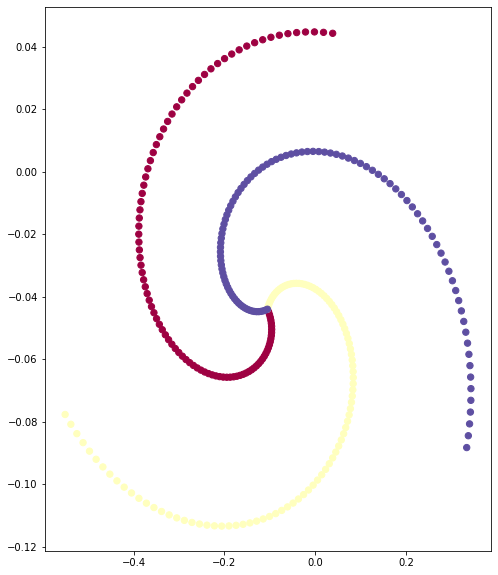

In [30]:
Xpredict = np.dot(X, W) + b
plt.scatter(Xpredict[:, 0], Xpredict[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
print('--> Predicted Output')
plt.show()

Now that we've tested our neural network, let's pass the reduced dataset from above into our model. Remember, our model will produce a vector containing scores representing applicants' likilihood of loan approval.  

In [31]:
N = x_train.shape[0]                           # number of points per class
D = x_train.shape[1]                             # dimensionality 
K = 1                             # number of classes 
X = x_train           
 # data matrix
y = y_train  # class labels

In [32]:
h = 100
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = np.random.randn(h, K) * 0.01
b2 = np.zeros((1, K))
num_examples = X.shape[0]

step_size = 1e-1
reg = 1e-3

In [33]:
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # ReLU activation
  hidden_layer -= np.mean(hidden_layer, axis=0)
  scores = np.dot(hidden_layer, W2) + b2
  scores -= np.max(scores)

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  correct_logprobs = - np.log(probs[range(num_examples), 0])
  data_loss = np.sum(correct_logprobs) / num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss 
  if i % 1000 == 0:
    print('iteration %d: loss %f' % (i, loss))

  # compute the gradient on the scores  
  dscores = probs
  dscores[range(num_examples), 0] -= 1
  dscores /= num_examples

  dW2 = hidden_layer.T.dot(dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # backprop into hidden layer
  dhidden = dscores.dot(W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b  
  dW = X.T.dot(dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization to the contribution
  dW2 += reg * W2
  dW += reg * W

  # perform parameter update
  W += -step_size * dW
  b += -step_size * db 
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 0.000059
iteration 1000: loss 0.000049
iteration 2000: loss 0.000040
iteration 3000: loss 0.000033
iteration 4000: loss 0.000027
iteration 5000: loss 0.000022
iteration 6000: loss 0.000018
iteration 7000: loss 0.000015
iteration 8000: loss 0.000012
iteration 9000: loss 0.000010


In [42]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 0.88


In [44]:
from sklearn.metrics import precision_recall_fscore_support as metrics
metrics(y, predicted_class)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([0.88362246, 0.        ]),
 array([1., 0.]),
 array([0.9382161, 0.       ]),
 array([27964,  3683]))